# Data Wrangling: WeRateDogs Twitter Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
import os
import re
import requests
import time
import warnings
warnings.filterwarnings('ignore')

Gathering Data

In [2]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
file_name=url.split('/')[-1]
response=requests.get(url)
with open (file_name,'wb') as file:
    file.write(response.content)
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
API_KEY = "34HQg3PVZYahlctq8zuUZ6HSU"
API_SECRET_KEY = "G43EOJln1tzVRYmD2tQ26m9SHj1qia7xNth2CQUdCuub1VdCjZ"
ACCESS_TOKEN = "826717073724362753-YL3kIKHNJLOR1QYdQRx7MsZVSjJOPuA"
ACCESS_TOKEN_SECRET = "ayL3tbxakcWOB3k4DSCzVc85HiqLPkzuvgyb8ZddSOQoo"

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
exp_tweet = api.get_status(twitter_archive.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [10]:
df_list = []
error_list = []

start = time.time()

# Will add each available tweet json to df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # tweet's favorites
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] # user's favorites
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets': int(retweets),
                        'user_followers': int(user_followers), 'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print(str(tweet_id)+ " __ " + str(e))
        error_list.append(tweet_id)
        

end = time.time()
print(end - start)

888202515573088257 __ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 __ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 __ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 __ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 __ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 __ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 __ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 __ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 __ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 __ [{'code': 144, 'message': 'No status found with that ID.'}]
8373662848745717

In [11]:
print("The lengh of the result", len(df_list))
print("The lengh of the errors", len(error_list))

The lengh of the result 2331
The lengh of the errors 25


In [15]:

# Create DataFrames 'json' and save it in a file
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers',
                                               'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [16]:
tweet_data=pd.read_csv('tweet_json.txt',encoding='utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35093,7390,8959626,145850,2017-08-01 16:23:56
1,892177421306343426,30383,5505,8959626,145850,2017-08-01 00:17:27
2,891815181378084864,22845,3638,8959626,145850,2017-07-31 00:18:03
3,891689557279858688,38368,7567,8959626,145850,2017-07-30 15:58:51
4,891327558926688256,36642,8151,8959626,145850,2017-07-29 16:00:24
5,891087950875897856,18484,2734,8959626,145850,2017-07-29 00:08:17
6,890971913173991426,10745,1770,8959626,145850,2017-07-28 16:27:12
7,890729181411237888,59100,16545,8959626,145850,2017-07-28 00:22:40
8,890609185150312448,25426,3786,8959626,145850,2017-07-27 16:25:51
9,890240255349198849,29017,6416,8959626,145850,2017-07-26 15:59:51


In [17]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


Gathering Summary¶
We finished the first step in the data wrangling. We managed to gather data from an existing csv file, downloaded a tsv file and queried Twitter's API using Tweepy. Finally, we imported the data into the Jupyter Notebook.

# Assessing


In [18]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,None,None,None,None
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,None,None,None,None
538,806620845233815552,NaN,NaN,2016-12-07 22:06:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Idk why this keeps happening. W...,7.815247e+17,4.196984e+09,2016-09-29 16:03:01 +0000,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
1490,692901601640583168,NaN,NaN,2016-01-29 02:46:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692901601...,10,10,None,None,None,None,None
103,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,None,None,None


Quality:

Source format is bad and can not be read easily.

Tidiness:

Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.

In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Quality:

1) in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
2) retweeted_status_timestamp, timestamp should be datetime instead of object (string).


In [20]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Quality:

Missing values from images dataset (2075 rows instead of 2356).
Some tweets have 2 different tweet_id, that is retweets.

In [23]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


Quality:

The numerator and denominator columns have invalid values.

In [25]:
twitter_archive[twitter_archive['name'].apply(len) <= 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None



Quality:

There are invalid names (a, an and less than 3 characters).

In [26]:

#Orignal tweets 
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None



Quality:

There are retweeted tweets, and we do not want it.

In [28]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


# Assessing Summary

# Quality

* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
retweeted_status_timestamp, timestamp should be datetime instead of object (string).
* The numerator and denominator columns have invalid values.
* In several columns null objects are non-null (None to NaN).
* There are invalid names (a, an and less than 3 characters).- We only want original ratings tweets, not retweets.
* We might change the type of columns: (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string since we aren't doing any actions on them.
Sources are not readable.
* Missing values from images dataset (2075 rows instead of 2356)
* Some tweet_ids have the same jpg_url
* Some tweets have 2 different tweet_id, that are retweets

# Tidiness

* Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.
* Merge 'tweet_info' and 'image_predictions' into 'twitter_archive'.

# Cleaning

In [29]:
#Copy Dataframes
tweet_data_clean = tweet_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()

Define

Merge tweet_info and image_predictions into twitter_archive

Code

In [30]:

twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [31]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

Test

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorites                     2059 

Define

Move doggo, floofer, pupper and puppo columns into one column dog_stage

Code

In [33]:
#Some dogs has multiple stages, will concatenate them.

twitter_archive_clean.loc[twitter_archive_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1741
1,,,,puppo,23
2,,,pupper,,210
3,,floofer,,,7
4,doggo,,,,65
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [34]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

Test

In [35]:
twitter_archive_clean.dog_stage.value_counts()

None             1741
pupper            210
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

Define

Delete rows and columns that we will not use them or benefit from them.

Code

In [36]:

#Retweets:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

#Duplicated tweet_id:
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

#Without pictures:
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])

#Useless columns:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

#Since we have timestamp column, we do not need date_time:
twitter_archive_clean = twitter_archive_clean.drop('date_time', 1)

#Duplicates in dog_stage:
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

Test

In [37]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None             1682
pupper            203
doggo              62
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64
1987


Define

Delete image prediction columns

Code

In [38]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(prediction_func, axis=1)
twitter_archive_clean['prediction'] = predictions
twitter_archive_clean['confidence_level'] = confidence_level



# Delete columns
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'user_favourites'], 1)

Test

In [39]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'user_followers',
 'jpg_url',
 'dog_stage',
 'prediction',
 'confidence_level']

Define

Make 'source' column clean and readable.

Code

In [40]:

twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

Test

In [43]:

twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,35093,7390,8959626,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1375,683852578183077888,2016-01-04 03:28:54 +0000,Twitter for iPhone,Say hello to Tiger. He's a penbroke (little do...,https://twitter.com/dog_rates/status/683852578...,10,10,Tiger,,,,,1875,331,8959644,https://pbs.twimg.com/media/CX2ISqSWYAAEtCF.jpg,None,toy_poodle,0.551352
1374,683857920510050305,2016-01-04 03:50:08 +0000,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10,10,Sadie,,,,,3671,1075,8959644,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,None,bluetick,0.174738
1373,684097758874210310,2016-01-04 19:43:10 +0000,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,,,,,3965,1379,8959644,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,None,Labrador_retriever,0.627856
1372,684122891630342144,2016-01-04 21:23:02 +0000,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11,10,None,,,,,1931,450,8959644,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,NaN,0.000000



Define

Fix rating numerator and denominators that are not ratings

Code

In [44]:
tmp_rating = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in tmp_rating:
    x = twitter_archive_clean.text == i
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    twitter_archive_clean.loc[x, column_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    twitter_archive_clean.loc[x, column_2] = 10

Test

In [45]:

twitter_archive_clean[twitter_archive_clean.text.isin(tmp_rating)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1392,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,,,,,35367,15712,8959644,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,None,Chihuahua,0.155207
1282,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,,,,,2102,721,8960091,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,None,collie,0.600186
1271,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,,,,,1822,431,8959644,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,None,Pembroke,0.426459
1513,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,,,,,1573,504,8959644,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,None,Blenheim_spaniel,0.924127
1547,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,,,,,2149,972,8959656,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,None,Chihuahua,0.376741
1004,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,,,,,2921,699,8959643,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,None,collie,0.176758
1221,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,,,,,1965,586,8959644,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,None,Australian_terrier,0.407886
1216,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,,,,,1545,565,8959644,https://pbs.twimg.com/ext_tw_video_thumb/69506...,None,NaN,0.000000
1256,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,,,,,2309,537,8959644,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,None,bloodhound,0.886232
1126,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,,,,,1843,370,8959643,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,None,Border_collie,0.894842



Define

Clean decimal values in rating numerators.

Code

In [46]:

# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1438,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,,,,,1661,465,8959644,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,,18026,6015,8959628,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,,,,41725,8660,8959626,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,,,pupper,,6437,1565,8959629,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [47]:

ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1375,10,10
1374,10,10
1373,10,10
1372,11,10
1371,10,10
1370,10,10
1369,9,10
1368,6,10
1367,121,110


In [48]:
twitter_archive_clean['rating_numerator'] = ratings[0]

Test

In [49]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1438,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,,,,,1661,465,8959644,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,,,,,18026,6015,8959628,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,,,,,41725,8660,8959626,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,,,pupper,,6437,1565,8959629,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718



Define

Convert the null values to None type

Code

In [50]:
twitter_archive_clean.loc[twitter_archive_clean['prediction'] == 'NaN', 'prediction'] = None
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 63
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null object
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1679 non-null object
confidence_level      1987 non-null float64
dtypes: float64(1), int64(5), object(13)
memory usage: 310.5+ KB



Define

Change datatypes .

Code

In [52]:

twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['favorites'] = twitter_archive_clean['favorites'].astype(int)
twitter_archive_clean['retweets'] = twitter_archive_clean['retweets'].astype(int)
twitter_archive_clean['user_followers'] = twitter_archive_clean['user_followers'].astype(int)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

Test

In [53]:
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
favorites                      int64
retweets                       int64
user_followers                 int64
jpg_url                       object
dog_stage                   category
prediction                    object
confidence_level             float64
dtype: object

# Store

In [54]:
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1987 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1679 non-null object
confidence_level      1987 non-null float64
dtypes: float64(3), int64(4), object(12)
memory usage: 295.0+ KB


# Analyzing & Visualizing Data

In [55]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1987 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1679 non-null object
confidence_level      1987 non-null float64
dtypes: float64(3), int64(4), object(12)
memory usage: 295.0+ KB


In [56]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,35093,7390,8959626,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1,683852578183077888,2016-01-04 03:28:54,Twitter for iPhone,Say hello to Tiger. He's a penbroke (little do...,https://twitter.com/dog_rates/status/683852578...,10.0,10.0,Tiger,NaN,NaN,NaN,NaN,1875,331,8959644,https://pbs.twimg.com/media/CX2ISqSWYAAEtCF.jpg,None,toy_poodle,0.551352
2,683857920510050305,2016-01-04 03:50:08,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10.0,10.0,Sadie,NaN,NaN,NaN,NaN,3671,1075,8959644,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,None,bluetick,0.174738
3,684097758874210310,2016-01-04 19:43:10,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10.0,10.0,Lupe,NaN,NaN,NaN,NaN,3965,1379,8959644,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,None,Labrador_retriever,0.627856
4,684122891630342144,2016-01-04 21:23:02,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11.0,10.0,None,NaN,NaN,NaN,NaN,1931,450,8959644,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,NaN,0.000000


In [57]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

df.set_index('timestamp', inplace=True)


In [58]:
df.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,12.236930,10.511827,8020.369904,2359.724207,8.959646e+06,0.463913
std,41.544174,7.274245,11814.374885,4222.575761,4.332297e+01,0.339364
min,0.000000,7.000000,69.000000,11.000000,8.959626e+06,0.000000
25%,10.000000,10.000000,1718.500000,529.000000,8.959628e+06,0.140041
50%,11.000000,10.000000,3624.000000,1141.000000,8.959643e+06,0.457356
75%,12.000000,10.000000,9953.500000,2685.500000,8.959656e+06,0.776138
max,1776.000000,170.000000,150943.000000,74584.000000,8.960105e+06,0.999956


What is the most common Dog?

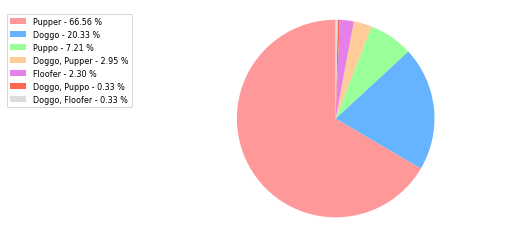

In [70]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8, )
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]




plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')

Pupper is the most common owned dog.

What is the most common rating?

In [71]:
df_integer_ratings_14 = df[(df.rating_numerator <= 14) & (df.rating_numerator.apply(float.is_integer))]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

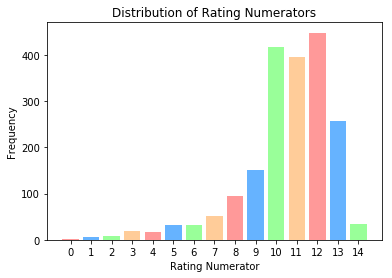

In [72]:

plt.bar(np.arange(15), subset_rating_counts, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

Most tweets are given a rating between 10 to 13.

What is the relation between Retweets & Likes?

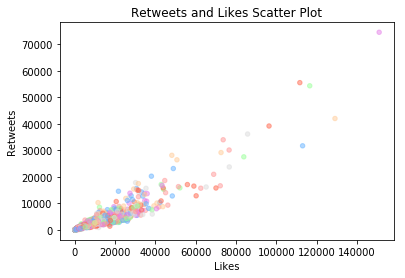

In [73]:

#Retweets vs. Likes

df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5, colors = colors)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

# Retweets are positively correlated with Likes.